<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Optics/DiffractionAndInterference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Interference and Diffraction
Interference and diffraction are fundamental phenomena in the realm of wave optics that play a crucial role in our understanding of light and other wave-like phenomena. These phenomena arise when waves, such as light or sound, interact with each other or encounter obstacles in their path, leading to remarkable patterns and behaviors. In this Jupyter notebook, we will explore the fascinating world of interference and diffraction, unraveling their underlying principles, mathematical descriptions, and practical applications.

## *Interference*: The Dance of Waves
Interference occurs when two or more waves overlap, creating a new wave pattern that results from the superposition of the individual waves. This phenomenon is often characterized by alternating regions of constructive and destructive interference, where waves reinforce or cancel each other out. Interference is a hallmark of wave behavior and is commonly observed in optics, where it gives rise to vibrant colors in soap bubbles, thin films, and diffraction gratings. Understanding interference is essential in various scientific and technological fields, from astronomy to engineering, where it enables the development of advanced optical instruments and the study of wave-based phenomena.

## *Diffraction*: The Bending of Waves
Diffraction, on the other hand, is the phenomenon in which waves spread out as they encounter an obstacle or aperture. This bending of waves around the edges of objects can lead to intricate patterns, especially when dealing with light passing through narrow slits or around sharp edges. Diffraction is a phenomenon closely related to interference, as it results from the interaction of waves with each other and with the boundaries of objects. It plays a pivotal role in fields like microscopy, spectroscopy, and the design of optical devices. In this notebook, we will delve into the mathematical foundations of diffraction, exploring how the width of slits and the separation of obstacles can significantly influence the observed diffraction patterns and provide valuable insights into wave behavior.



## Diffraction from Two Slits

##### The diffraction pattern of two slits of width D that are separated by a distance d is the interference pattern of two point sources separated by d multiplied by the diffraction pattern of a slit of width D.

In [1]:
# libraries
import numpy as np
from numpy import sin, cos, pi
import matplotlib.pyplot as plt

In [2]:
π=pi

def β(λ,D,θ):
  return (π/λ)*D*sin(θ)

def α(λ,d,θ):
  return (π/λ)*d*sin(θ)

In [3]:
def diffractionFactor(β):
  return (sin(β)/β)**2

In [4]:
def interferenceFactor(α):
  return (2*cos(α))**2

In [5]:
def intensityPattern(θ,λ,d,D):
    return diffractionFactor(β(λ,D,θ))*interferenceFactor(α(λ,d,θ))

In [6]:
θ_b=0.002
θ=np.linspace(-θ_b,θ_b,1000)  # range of angles in radians

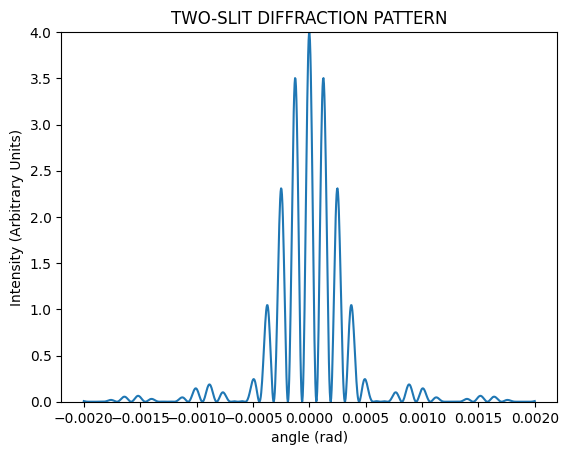

In [15]:
λ=6.32E-7 ## wavelength in (m)
d=0.005 ## distance between slits in (m)
D=0.001 ## width of slits in (m)
plt.plot(θ,intensityPattern(θ,λ,d,D))
plt.ylim(0,4)
plt.xlabel('angle (rad)')
plt.ylabel('Intensity (Arbitrary Units)')
plt.title("TWO-SLIT DIFFRACTION PATTERN")
plt.show()

## 2D diffraction (Rectangular Slits)

In [8]:
def diffractionFactor2D(βx,βy):
  return (sin(βx)/βx)**2*(sin(βy)/βy)**2
def interferenceFactor2D(αx,αy):
  return (2*cos(αx))**2*(2*cos(αy))**2
def intensityPattern2D(θx,θy,Dx,Dy,dx,dy,λ):
    return diffractionFactor2D(β(λ,Dx,θx),β(λ,Dy,θy))*interferenceFactor2D(α(λ,dx,θx),α(λ,dy,θy))

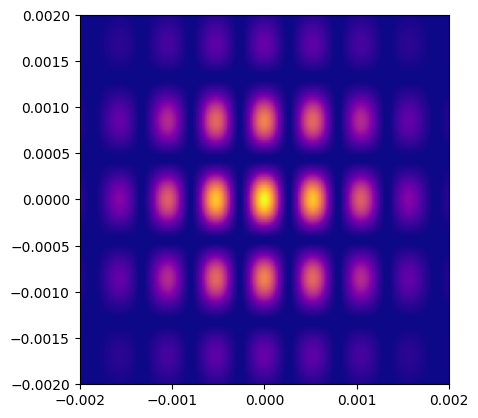

In [9]:
# create data
θ_b=0.002

xMin=-θ_b
yMin=-θ_b
xMax=θ_b
yMax=θ_b
nbins=500

xi, yi = np.mgrid[xMin:xMax:nbins*1j, yMin:yMax:nbins*1j]

Dx=0.0002
Dy=0.0002
dx=0.001
dy=0.0006
λ=5.32E-7
zi = intensityPattern2D(xi,yi,Dx,Dy,dx,dy,λ)

# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.plasma)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## 2D diffraction (Circular Slit)

In [ ]:
from scipy.special.cython_special import j1

In [ ]:
# diameter of the aperture
a = 0.01;
def diffractionFactorCircular(βr):
  return (2*j1(βr)/βr)
  #return (2*sin(βr)/βr)**2

diffractionFactorCircularVector = np.vectorize(diffractionFactorCircular)

def intensityPatternCircular(θx,θy,a,λ):
  θr=np.sqrt(θx**2+θy**2)
  return diffractionFactorCircularVector(β(λ,a,θr))


def diffractionFactorIntensityCircular(βr):
  return diffractionFactorCircularVector(βr)**2

diffractionFactorCircularVector = np.vectorize(diffractionFactorCircular)
def intensityPatternCircular(θx,θy,a,λ):
  θr=np.sqrt(θx**2+θy**2)
  return diffractionFactorIntensityCircular(β(λ,a,θr))

def electricFieldPatternCircular(θx,θy,a,λ):
  θr=np.sqrt(θx**2+θy**2)
  return diffractionFactorCircularVector(β(λ,a,θr))

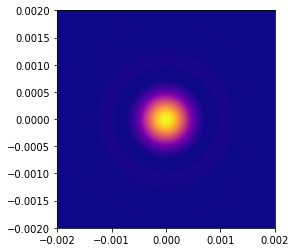

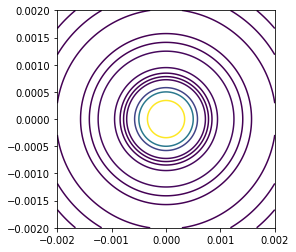

In [ ]:
# create data
θ_b=0.002

xMin=-θ_b
yMin=-θ_b
xMax=θ_b
yMax=θ_b
nbins=500

xi, yi = np.mgrid[xMin:xMax:nbins*1j, yMin:yMax:nbins*1j]

a=0.0008
λ=5.32E-7
zi = intensityPatternCircular(xi,yi,a,λ)

# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.plasma)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

plt.contour(xi, yi, zi.reshape(xi.shape),[0,0.001,0.01,0.1,0.2,0.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()